# Business Understanding

### Overview
MovieXplosion, an emerging streaming platform, is determined to enhance user satisfaction. The platform's success hinges on its ability to engage users effectively, and one strategy for achieving this goal is to offer personalized movie recommendations that encourage users to spend more time on the platform.
This project aims to create a movie recommendation system using collaborative filtering, content-based filtering, and hybrid approaches.

### Problem Statement
The current recommendation system employed by the platform falls short in delivering suitable suggestions to users, resulting in low user engagement, satisfaction, and retention rates. Additionally, the system struggles to provide valuable recommendations to new users, and existing users do not receive tailored suggestions.
The new system endeavors to overcome these challenges by delivering relevant recommendations to all users

### Objectives:
1. Build a model that provides top 5 recommendations to a user.
2. Develop a system that will address the `cold start` problem for new users.
3. Enhance the recommendation system to provide accurate and relevant movie suggestions based on the user.
4. Evaluate the system performance using appropriate metrics such as `RMSE`.

# Data Understanding

The data used was sourced from [MovieLens](https://grouplens.org/datasets/movielens/latest/), I used the small dataset due to limited computational power. The data contains information about movies, ratings by users and other relevant information.
### Data Description
There are several files available with different columns:
1. Movies File
- It contains information about the movies.<br>
`movieId` - Unique identifier for each movie.<br>
`title` - The movie titles.<br>
`genre` - The various genres a movie falls into.<br>
2. Ratings file
- It contains the ratings for the movies by different users.<br>
`userId` - Unique identifier for each user<br>
`movieId` - Unique identifier for each movie.<br>
`rating` - A value between 0 to 5 that a user rates a movie on. A higher rating indicates a higher preference.<br>
`timestamp` - This are the seconds that have passed since Midnight January 1, 1970(UTC)
3. Tags file
- It has user-generated words or short phrases about a movie with the meaning or value being determined ny the specific user.<br>
`userId` - Unique identifier for each user<br>
`movieId` - Unique identifier for each movie.<br>
`tag` - A word or phrase determined by the user.<br>
`timestamp` - This are the seconds that have passed since Midnight January 1, 1970(UTC)
4. Links file
- This are identifiers that can be used to link to other sources of movie data as provide by MovieLens.<br>
`movieId` -  It's an identifier for movies used by https://movielens.org. E.g., the movie Toy Story has the link https://movielens.org/movies/1.<br>
`imdbId` -  It's an identifier for movies used by http://www.imdb.com. E.g., the movie Toy Story has the link http://www.imdb.com/title/tt0114709/.<br>
`tmdbId` -  is an identifier for movies used by https://www.themoviedb.org. E.g., the movie Toy Story has the link https://www.themoviedb.org/movie/862. <br>

In [3]:
pip install WordCloud

In [5]:
pip install scikit-surprise

In [6]:
#importing relevant libraries
#standard libraries
import pandas as pd
import numpy as np


#visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from wordcloud import WordCloud
%matplotlib inline

from surprise import Reader, Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.prediction_algorithms import SVD, KNNBasic, KNNBaseline,KNNWithMeans
from surprise.model_selection import GridSearchCV



In [7]:
# loading movie data
mov_df = pd.read_csv('movies.csv')
mov_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
#checking the shape of the DataFrame
mov_df.shape

(9742, 3)

We observe that this dataset has a total of 9742 Rows

In [9]:
#Checking the information on the DataFrame
mov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [10]:
#loading Tags data
tags_df=pd.read_csv('tags.csv')
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [11]:
#checking the shape of the DataFrame
tags_df.shape

(3683, 4)

We can see that we have 3683 Rows in this dataset

In [12]:
#checking the DataFrame information
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [13]:
#loading links data
links_df=pd.read_csv('links.csv')
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [14]:
#checking shape of the DataFrame
links_df.shape

(9742, 3)

We can see that we have a total of 9742 rows in this dataset

In [15]:
#checking links DataFrame information
links_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [16]:
# ratings dataframe
ratings_df = pd.read_csv('ratings.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [17]:
#checking the shape of the DataFrame
ratings_df.shape

(100836, 4)

We find that this dataset contains a total of 100836 rows.

In [18]:
#checking the information on the DataFrame
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


Great, now lets get to preparing our data !

# Data Preparation

For ease of understanding and cleaning, we will merge the movie dataset and the ratings dataset. This will result to a dataset with the movie name, its genre  and its rating.

In [19]:
#Merging movie dataFrame with ratings DataFrame
mov_df= pd.merge(mov_df, ratings_df, on='movieId')
mov_df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


  Since Timestamp is irrelevant for our analysis we will drop the column

In [20]:
#Dropping Timestamp column
mov_df.drop(['timestamp'], axis=1, inplace=True)

In [21]:
#confirming it has been dropped
mov_df.head(2)

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0


In [22]:
#checking DataFrame information
mov_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   movieId  100836 non-null  int64  
 1   title    100836 non-null  object 
 2   genres   100836 non-null  object 
 3   userId   100836 non-null  int64  
 4   rating   100836 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ MB


We can now see that we have one harmonised dataframe that has all columns we may want to use for our analysis




In [23]:
#Checking null count
mov_df.isna().sum()

movieId    0
title      0
genres     0
userId     0
rating     0
dtype: int64

In [24]:
#Checking for duplicates
mov_df.duplicated().sum()

0

Great so we find that we have no missing values and any duplicates in this DataFrame. Lets find out about the other 2 DataFrames.

In [25]:
#Checking for null values in the tags DataFrame
tags_df.isna().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [26]:
#Checking for duplicates in tags DataFrame
tags_df.duplicated().sum()

0

In [27]:
#Checking for duplicates in links DataFrame
links_df.duplicated().sum()

0

In [28]:
#Checking null count
links_df.isna().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

We have found some 8 missing values in the 'tmdbId' column. Considering we have 9742 rows, conisidering these 8 rows as null values wouldnt really affect the genuinity of the dataset with regards to analysis and modelling.   

In [29]:
#Filling the missing values with null
links_df['tmdbId'].fillna(0, inplace=True)

In [30]:
#Confirming the 8 cells have been replaced by null
links_df.isna().sum()

movieId    0
imdbId     0
tmdbId     0
dtype: int64

In [31]:
# We have userID and timestamp columns in the tags data. Therefore, we can drop the two columns.

# Drop the 'userId' and 'timestamp' columns
tags_df = tags_df.drop(['userId', 'timestamp'], axis=1)

# View the updated DataFrame
tags_df.head()

,movieId,tag
0,60756,funny
1,60756,Highly quotable
2,60756,will ferrell
3,89774,Boxing story
4,89774,MMA


Now lets create a column named Year. We will use feature engineering technique to extract the year in which a movie was released.

In [32]:
# Extract the year from the 'Title' column and create a new column 'Year'
mov_df['Year'] = mov_df['title'].str.extract(r'\((\d{4})\)')

# View the updated DataFrame with the 'Year' column
mov_df.head()

,movieId,title,genres,userId,rating,Year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,1995
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1995
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1995
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1995
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1995


Perfect, now lets merge this DataFrame with the tags DataFrame so that we can have the 'tag' column as well.

In [33]:
#Merging movie dataFrame with tags DataFrame
mov_df= pd.merge(mov_df, tags_df, on='movieId')

#view updated DataFrame
mov_df.head()

,movieId,title,genres,userId,rating,Year,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,1995,pixar
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,1995,pixar
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,1995,fun
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1995,pixar
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1995,pixar


# Exploratory Data Analysis

In [34]:
# EDA: Movie Genres Distribution
genre_counts = mov_df['genres'].str.split('|', expand=True).stack().value_counts()
genre_fig = px.bar(genre_counts, x=genre_counts.index, y=genre_counts.values,
                   labels={'x': 'Genres', 'y': 'Count'}, title='Distribution of Movie Genres')

genre_fig.show()

The distribution reveals that the highest number of movies are in the drama genre while the genre with the least is film-Noir. This would mean that Drama is the most prevalent genre among the movies in the dataset.

In [35]:
# EDA: Rating Distribution
rating_hist = px.histogram(ratings_df, x='rating', title='Distribution of Ratings')
rating_hist.update_xaxes(title_text='Rating')
rating_hist.update_yaxes(title_text='Count')

rating_hist.show()

Majority of the movies are rated 4 while least rated 0.5. This can mean we have a higher number of movies that users have some interest to.

In [36]:
mov_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233213 entries, 0 to 233212
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   movieId  233213 non-null  int64  
 1   title    233213 non-null  object 
 2   genres   233213 non-null  object 
 3   userId   233213 non-null  int64  
 4   rating   233213 non-null  float64
 5   Year     233210 non-null  object 
 6   tag      233213 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 22.3+ MB


Let's now find out the top 10 movies and the bottom 5 movies based on ratings

In [37]:
# The average rating for each movie
average_ratings = mov_df.groupby('title')['rating'].mean().reset_index()
# Sorting movies by average rating in ascending order to get the bottom 10
top_10_movies = average_ratings.sort_values('rating').tail(10)

# Creating interactive bar charts for bottom 10 movies
top_10_fig = px.bar(top_10_movies, x='rating', y='title', orientation='h',
                      labels={'x': 'Average Rating', 'y': 'Movie Title'},
                      title='Top 10 Movies by Average Rating')
# Showing the interactive plots
top_10_fig.show()

The top 10 movies all have a rating of 5.These movies are likely exceptional in terms of their quality, storytelling, performances, entertainment value, or any other criteria that contribute to the ratings. They are definitely very favourable movies !

In [38]:
# The average rating for each movie
average_ratings = mov_df.groupby('title')['rating'].mean().reset_index()

# Sorting movies by average rating in ascending order to get the bottom 5
bottom_5_movies = average_ratings.sort_values('rating').head(5)

# Creating interactive bar charts for bottom 5 movies
bottom_5_fig = px.bar(bottom_5_movies, x='rating', y='title', orientation='h',
                      labels={'x': 'Average Rating', 'y': 'Movie Title'},
                      title='Bottom 5 Movies by Average Rating')
# Showing the interactive plots
bottom_5_fig.show()



We observe that the bottom 5 movies have a rating between 0.5-1.5. These are the movies that have not been favourable to the users generally.

In [39]:
# Calculating the top 10 genres
genres_counts = mov_df['genres'].value_counts().head(10).reset_index()
genres_counts.columns = ['Genres', 'Count']

# Creating a Plotly Express bar chart
fig = px.bar(genres_counts, x='Genres', y='Count',
             labels={'Genres': 'Genres', 'Count': 'Count'},
             title='Top 10 Movie Genres',
             text='Count')

# Rotating x-axis labels for better readability
fig.update_xaxes(tickangle=45)

# Showing the interactive plot
fig.show()

It's interesting to note that the combination of Comedy, Crime, Drama, and Thriller genres appears to be highly prevalent in the dataset. This finding indicates that movies with these genre combinations might have a broad appeal among the users.

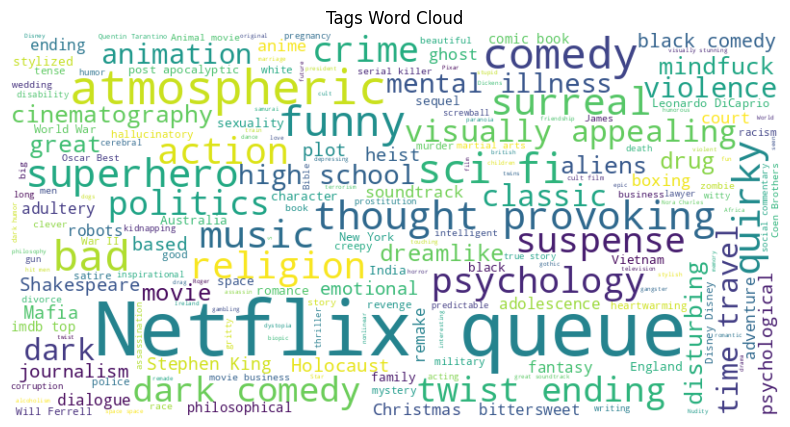

In [40]:
# Word cloud for tags
from wordcloud import WordCloud

tags_text = " ".join(tags_df['tag'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tags_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Tags Word Cloud")
plt.axis('off')
plt.show()

## Descriptive statistics

In [41]:
# Summary statistics for ratings
rating_stats = mov_df['rating'].describe()
print(rating_stats)

# Percentiles for ratings
percentiles = [0.25, 0.50, 0.75]
rating_percentiles = mov_df['rating'].quantile(percentiles)
print(rating_percentiles)

count    233213.000000
mean          3.966535
std           0.968637
min           0.500000
25%           3.500000
50%           4.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64
0.25    3.5
0.50    4.0
0.75    5.0
Name: rating, dtype: float64


The mean movie rating is `3.97` with a standard deviation of `0.97`.<br>
Atleast 50% of the movies were rated `4.0`. This implies that most of the movies produced are liked by the consumers.
Therefore, our streaming platform should aim to feature movies rated atleast `3.5` and above.

In [42]:
#User Analysis
# Distribution of ratings by user
user_ratings = mov_df.groupby('userId')['rating'].count()
print(user_ratings)

# Top 10 most active users
top_users = user_ratings.nlargest(10)
print(top_users)


userId
1       593
2       143
3        27
4       580
5       278
       ... 
606    1407
607     450
608    1285
609     241
610    1701
Name: rating, Length: 610, dtype: int64
userId
474    2455
414    2343
599    2100
68     1791
610    1701
274    1665
249    1635
448    1575
380    1536
305    1460
Name: rating, dtype: int64


We can see the top users based on their ids. The top being user 474 giving 2455 ratings, making the user the most active user in the dataset.

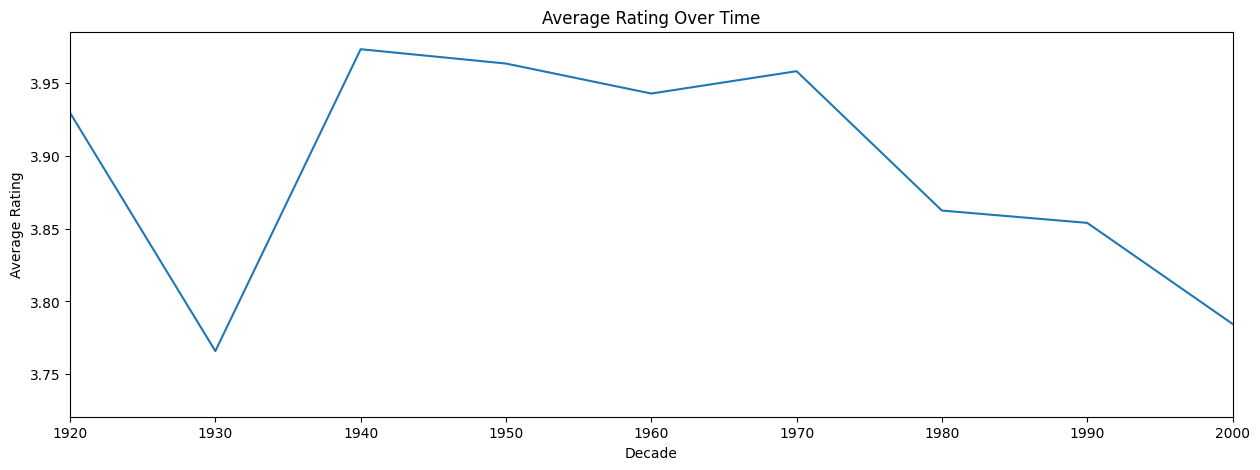

In [43]:
# Trends in ratings over time
mov_df['Year'] = pd.to_numeric(mov_df['Year'], errors='coerce')  # Convert 'Year' column to numeric

ratings_over_time = mov_df.groupby('Year')['rating'].mean().reset_index()
ratings_over_time['Decade'] = (ratings_over_time['Year'] // 10) * 10

ratings_by_decade = ratings_over_time.groupby('Decade')['rating'].mean().reset_index()

# Line plot for ratings over time
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(ratings_by_decade['Decade'], ratings_by_decade['rating'])
plt.xlabel('Decade')
plt.xlim(1920, 2000)  # Set the x-axis limits
plt.ylabel('Average Rating')
plt.title('Average Rating Over Time')

# Show the plot
plt.show()

The lowest mean rating was observed for films produced during the 1930s, whereas movies from the 1940s received the highest average ratings.
In general, average ratings have been on a downward trend since the 1950s, with a particularly steep decline noted between 1970 and 1980.
The year of a movie's production appears to be a highly informative factor in predicting its average rating.

## Collaborative Filtering

## 1. Using Surprise method

### Cosine similarity

In [44]:
# Create a user-item matrix
# - Rows represent users, columns represent movie titles, and values are user ratings.
user_item_matrix = mov_df.pivot_table(index='userId', columns='title', values='rating')

In [45]:
# Calculate User Similarity Using Cosine Similarity
# - Compute the cosine similarity between users based on their movie ratings.
# - The result is a similarity matrix where each cell represents the similarity between two users.
# - Higher values indicate greater similarity in movie preferences.
from sklearn.metrics.pairwise import cosine_similarity

user_similarity = cosine_similarity(user_item_matrix.fillna(0))
user_similarity

array([[1.        , 0.02224832, 0.0270014 , ..., 0.40235727, 0.15975729,
        0.25139106],
       [0.02224832, 1.        , 0.        , ..., 0.0543633 , 0.04352786,
        0.17754096],
       [0.0270014 , 0.        , 1.        , ..., 0.08429046, 0.        ,
        0.02304937],
       ...,
       [0.40235727, 0.0543633 , 0.08429046, ..., 1.        , 0.18023306,
        0.50608052],
       [0.15975729, 0.04352786, 0.        , ..., 0.18023306, 1.        ,
        0.1165446 ],
       [0.25139106, 0.17754096, 0.02304937, ..., 0.50608052, 0.1165446 ,
        1.        ]])

In [46]:
target_user_id = 15 # ID of the target user
target_user_ratings = user_item_matrix.loc[target_user_id].fillna(0)  # Ratings of the target user

# Calculate the weighted average ratings from similar users
weighted_avg_ratings = user_similarity[target_user_id - 1].dot(user_item_matrix.fillna(0))

# Exclude items the target user has already rated
recommended_items = [(user_item_matrix.columns[i], rating) for i, rating in enumerate(weighted_avg_ratings) if target_user_ratings.iloc[i] == 0]

# Sort the recommended items by rating in descending order
recommended_items.sort(key=lambda x: x[1], reverse=True)

# Get the top N recommendations
top_N = 10  # Specifies the number of recommendations
top_N_recommendations = recommended_items[:top_N]

print(f"Top {top_N} Recommendations for User {target_user_id}:")
for title, rating in top_N_recommendations:
    print(f"{title}: {rating}")

Top 10 Recommendations for User 15:
Silence of the Lambs, The (1991): 279.52296745049193
Lord of the Rings: The Return of the King, The (2003): 240.92833239281234
Braveheart (1995): 231.2145233094806
Usual Suspects, The (1995): 216.5638436825263
Jurassic Park (1993): 214.03566332443765
Fargo (1996): 178.88263264636538
Pirates of the Caribbean: The Curse of the Black Pearl (2003): 172.79221913884052
Indiana Jones and the Last Crusade (1989): 170.48749801845506
Apollo 13 (1995): 170.19596345823575
Twelve Monkeys (a.k.a. 12 Monkeys) (1995): 164.4935037092987


Based on collaborative filtering using cosine similarity. Here's what the output means:

The list above contains movie titles and their corresponding recommendation scores (ratings) for movies that can be recommended for User 12. These recommendation scores are based on collaborative filtering and cosine similarity.

### Employing Cross Validation

#### 1. KNNBasic

In [47]:
from surprise.model_selection import cross_validate

# Specifying the rating scale in the dataset
reader = Reader(rating_scale=(0.5, 5))
# Load the dataset from the DataFrame
data = Dataset.load_from_df(mov_df[['userId', 'movieId', 'rating']], reader)


# Split the dataset into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Choose a collaborative filtering algorithm (KNNBasic) and train it on the training set
model = KNNBasic(sim_options={'user_based': True})
model.fit(trainset)

# Replace 'user_id' with the ID of the user for whom you want to make recommendations
user_id = 1

# Get a list of all movie IDs
all_movie_ids = mov_df['movieId'].unique()

# Remove movies that the user has already rated
movies_rated_by_user = mov_df[mov_df['userId'] == user_id]['movieId'].values
movies_to_predict = [movie_id for movie_id in all_movie_ids if movie_id not in movies_rated_by_user]

# Predict ratings for movies the user has not rated
predictions = [model.predict(user_id, movie_id) for movie_id in movies_to_predict]

# Sort the predictions by estimated rating in descending order
predictions.sort(key=lambda x: x.est, reverse=True)

# Get the top 5 movie recommendations
top_5_recommendations = predictions[:5]

# Display the top 5 movie recommendations for the user
print(f"Top 5 Movie Recommendations for User {user_id}:")
for prediction in top_5_recommendations:
    movie_title = mov_df[mov_df['movieId'] == prediction.iid]['title'].values[0]
    estimated_rating = prediction.est
    print(f"{movie_title} (Estimated Rating: {estimated_rating:.2f})")





Computing the msd similarity matrix...
Done computing similarity matrix.
Top 5 Movie Recommendations for User 1:
Place in the Sun, A (1951) (Estimated Rating: 5.00)
More (1998) (Estimated Rating: 5.00)
Going Places (Valseuses, Les) (1974) (Estimated Rating: 5.00)
Lady Jane (1986) (Estimated Rating: 5.00)
Woman Under the Influence, A (1974) (Estimated Rating: 5.00)


We can see what the recommendations would be for User 1 based on the 'neighbors'

In [48]:
from surprise import accuracy

# Calculate RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error) on the test set
predictions = model.test(testset)

rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 0.5537
MAE:  0.3086
RMSE: 0.55
MAE: 0.31


With an initial RMSE of 0.55, the model appears to provide reasonably accurate predictions for movie ratings based on user-based collaborative filtering.

In [63]:

# Perform 5-fold cross-validation with RMSE as the evaluation metric
cv_results = cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)

# Print the average RMSE across folds
avg_rmse = cv_results['test_rmse'].mean()
print(f'Average RMSE: {avg_rmse:.4f}')

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.3986  0.4015  0.4081  0.4011  0.4011  0.4021  0.0032  
Fit time          3.17    3.43    3.38    3.20    7.50    4.14    1.68    
Test time         0.90    0.48    0.52    0.30    1.72    0.78    0.51    
Average RMSE: 0.4021


#### SVD Model

In [50]:

# Load the data and define the reader
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(mov_df[['userId', 'movieId', 'rating']], reader)

# Split the dataset into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Choose the SVD model
model = SVD()

# Perform cross-validation
cv_results = cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Print the average RMSE and MAE across folds
for metric in ['test_rmse', 'test_mae']:
    avg_metric = cv_results[metric].mean()
    print(f'Average {metric}: {avg_metric:.4f}')

# Replace 'user_id' with the ID of the user for whom you want to make recommendations
user_id = 1

# Fit the model on the entire dataset
trainset = data.build_full_trainset()
model.fit(trainset)

# Get a list of all movie IDs
all_movie_ids = mov_df['movieId'].unique()

# Remove movies that the user has already rated
movies_rated_by_user = mov_df[mov_df['userId'] == user_id]['movieId'].values
movies_to_predict = [movie_id for movie_id in all_movie_ids if movie_id not in movies_rated_by_user]

# Predict ratings for movies the user has not rated
predictions = [model.predict(user_id, movie_id) for movie_id in movies_to_predict]

# Sort the predictions by estimated rating in descending order
predictions.sort(key=lambda x: x.est, reverse=True)

# Get the top 5 movie recommendations
top_5_recommendations = predictions[:5]

# Display the top 5 movie recommendations for the user
print(f"Top 5 Movie Recommendations for User {user_id}:")
for prediction in top_5_recommendations:
    movie_title = mov_df[mov_df['movieId'] == prediction.iid]['title'].values[0]
    estimated_rating = prediction.est
    print(f"{movie_title} (Estimated Rating: {estimated_rating:.2f})")

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.3967  0.3941  0.3838  0.3926  0.3845  0.3903  0.0052  
MAE (testset)     0.2566  0.2485  0.2467  0.2500  0.2440  0.2492  0.0042  
Fit time          4.03    3.29    3.80    3.56    3.19    3.57    0.31    
Test time         0.55    0.39    0.89    0.29    0.62    0.55    0.20    
Average test_rmse: 0.3903
Average test_mae: 0.2492
Top 5 Movie Recommendations for User 1:
Babe (1995) (Estimated Rating: 5.00)
Shawshank Redemption, The (1994) (Estimated Rating: 5.00)
Blade Runner (1982) (Estimated Rating: 5.00)
Wallace & Gromit: The Best of Aardman Animation (1996) (Estimated Rating: 5.00)
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964) (Estimated Rating: 5.00)


The collaborative filtering model (SVD) appears to perform reasonably well, with an average RMSE of 0.3903 and an average MAE of 0.2492. The top 5 movie recommendations for User 1 are all highly rated by the model, suggesting that the model is making confident and positive recommendations for this user.

In [51]:
# Perform grid search for SVD
params = {'n_factors': [20, 50, 100], 'reg_all': [0.02, 0.05, 0.1]}
g_svd = GridSearchCV(SVD, param_grid=params, n_jobs=-1)
g_svd.fit(data)

print(g_svd.best_score)
print(g_svd.best_params)

{'rmse': 0.3994726329589696, 'mae': 0.2563151542582399}
{'rmse': {'n_factors': 100, 'reg_all': 0.02}, 'mae': {'n_factors': 100, 'reg_all': 0.02}}


Optimal Hyperparameters for RMSE and MAE:

The grid search suggests that using 100 latent factors and a regularization parameter of 0.02 leads to the best performance for the SVD collaborative filtering model in terms of both RMSE and MAE.



Now we can train the SVD model based on these hyperparameters

In [64]:
# Train SVD model

# Create an SVD model with your desired parameters
svd = SVD(n_factors=100, reg_all=0.02)

# Fit the SVD model with the trainset
svd.fit(trainset)

# Make predictions on the testset
predictions = svd.test(testset)

# Calculate and print RMSE (Root Mean Squared Error)
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")


RMSE: 0.2971
RMSE: 0.2970732487636531


We can see that the model is perfoming better than before meaning the hyperparameters were correct.

### Creating functions that will be able to get user input and give movie  Recommendations as feedback.

In [53]:
# Function to get user ratings for movies
def movie_rater(mov_df, num, genre=None):
    userID = 1000  # Set a default userID for new users
    rating_list = []
    while num > 0:
        if genre:
            movie = mov_df[mov_df['genres'].str.contains(genre)].sample(1)
        else:
            movie = mov_df.sample(1)
        print(movie)
        rating = input('How do you rate this movie on a scale of 1-5, press n if you have not seen, or type "escape" to see personalized recommendations:\n')
        if rating == 'n':
            continue
        elif rating.lower() == 'escape':
            return None  # Indicates the user wants personalized recommendations
        else:
            rating_one_movie = {'userId': userID, 'movieId': movie['movieId'].values[0], 'rating': float(rating)}
            rating_list.append(rating_one_movie)
            num -= 1
    return rating_list

In [54]:
# Function to recommend popular movies
def recommend_popular_movies(ratings_df, mov_df, genre, num_recommendations=5):
    # Calculate average ratings and number of ratings for each movie
    average_ratings = ratings_df.groupby('movieId')['rating'].mean()
    num_ratings = ratings_df.groupby('movieId')['rating'].count()

    # Create a DataFrame with movie popularity metrics
    popularity_df = pd.DataFrame({'average_rating': average_ratings, 'num_ratings': num_ratings})

    # Sort movies based on popularity metrics (e.g., average rating and number of ratings)
    popularity_df = popularity_df.sort_values(by=['average_rating', 'num_ratings'], ascending=False)

    # Filter movies by genre (if provided)
    if genre:
        popular_movies = mov_df[mov_df['genres'].str.contains(genre)]
        popular_movies = popular_movies.merge(popularity_df, on='movieId', how='left')
    else:
        popular_movies = popularity_df.merge(mov_df, on='movieId', how='left')

    # Get the top-rated or most popular movies from the sorted DataFrame
    top_movies = popular_movies.head(num_recommendations)

    # Return the recommended movies
    return top_movies['title']

Prompting a user for their ID:

In [ ]:
# Prompt the user to enter their user ID
user_id = input('Enter your user ID: ')

# Convert user_id to int data type
user_id = int(user_id)


In [56]:
# Check if the user already exists in the ratings dataset
if user_id in ratings_df['userId'].unique():
    # Get user ratings using the movie_rater function
    user_rating = movie_rater(mov_df, 4, genre='Comedy')

    if user_rating is None:
        # User wants personalized recommendations
        print("Personalized recommendations based on user's ratings")

        # Extract the user's ratings from the ratings dataframe
        user_ratings = ratings_df[ratings_df['userId'] == user_id]

        # Group the ratings by movie and calculate the average rating for each movie
        movie_ratings = user_ratings.groupby('movieId')['rating'].mean().reset_index()

        # Merge movie ratings with movie metadata
        personalized_movies = movie_ratings.merge(mov_df, on='movieId', how='left')

        # Sort the movies based on the average rating
        personalized_movies = personalized_movies.sort_values(by='rating', ascending=False)

        # Get the top 5 movie recommendations
        recommendations = personalized_movies['title'].head(5)

        # Print the recommendations
        for idx, rec in enumerate(recommendations):
            print(f"Recommendation #{idx+1}: {rec}")

    else:
        # User has provided ratings
        # Add the new ratings to the original ratings DataFrame
        user_ratings = pd.DataFrame(user_rating)
        new_ratings_df = pd.concat([ratings_df, user_ratings], ignore_index=True)

        # Define the reader
        reader = Reader(rating_scale=(1, 5))

        # Load the data from the DataFrame
        new_data = Dataset.load_from_df(new_ratings_df[['userId', 'movieId', 'rating']], reader)

        # Train the SVD model with the updated ratings
        svd = SVD()
        svd.fit(new_data.build_full_trainset())

        # Predict ratings for unrated movies
        predictions = []
        for movie_id in mov_df['movieId'].unique():
            predicted_rating = svd.predict(user_id, movie_id).est
            predictions.append((movie_id, predicted_rating))

        # Sort the predicted ratings
        ranked_predictions = sorted(predictions, key=lambda x: x[1], reverse=True)

        # Print the top 5 movie recommendations for the user
        print("Top 5 movie recommendations based on your ratings:")
        for idx, rec in enumerate(ranked_predictions[:5]):
            title = mov_df.loc[mov_df['movieId'] == rec[0], 'title'].values[0]
            print(f"Recommendation #{idx+1}: {title}")

else:
    # New user without any ratings
    print("Popular movie recommendations:")
    genre = input("Enter a genre to get recommendations based on that (leave blank for all genres): ")
    recommendations = recommend_popular_movies(ratings_df, mov_df, genre, num_recommendations=5)
    for idx, rec in enumerate(recommendations):
        print(f"Recommendation #{idx+1}: {rec}")

       movieId                title                       genres  userId  \
35444      296  Pulp Fiction (1994)  Comedy|Crime|Drama|Thriller     119   

       rating    Year                                   tag  
35444     4.0  1994.0  r:sustained strong stylized violence  
How do you rate this movie on a scale of 1-5, press n if you have not seen, or type "escape" to see personalized recommendations:
4
       movieId                title                       genres  userId  \
65083      296  Pulp Fiction (1994)  Comedy|Crime|Drama|Thriller     420   

       rating    Year     tag  
65083     4.0  1994.0  ironic  
How do you rate this movie on a scale of 1-5, press n if you have not seen, or type "escape" to see personalized recommendations:
3
        movieId                      title                genres  userId  \
125356     1277  Cyrano de Bergerac (1990)  Comedy|Drama|Romance     100   

        rating    Year               tag  
125356     4.0  1990.0  In Netflix queue  
How

After giving a few ratings based on different movies, a user is able to get 5 recommendations that he/she will probably like.

### Movie-based and User-based Collaborative Filtering

In [57]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets (e.g., 80% train, 20% test)
train_df, test_df = train_test_split(mov_df, test_size=0.2, random_state=42)

# Initializing dictionaries for user-to-movie and movie-to-user mappings for both training and testing sets
userToMovie_train = {}
movieToUser_train = {}
userMovieToRating_train = {}
movieUserToRating_train = {}

userToMovie_test = {}
movieToUser_test = {}
userMovieToRating_test = {}
movieUserToRating_test = {}

# Populating the dictionaries for the training set
for user, movie, rating in zip(train_df['userId'], train_df['movieId'], train_df['rating']):
    if user not in userToMovie_train:
        userToMovie_train[user] = [movie]
    else:
        userToMovie_train[user].append(movie)

    if movie not in movieToUser_train:
        movieToUser_train[movie] = [user]
    else:
        movieToUser_train[movie].append(user)

    userMovieToRating_train[(user, movie)] = rating
    movieUserToRating_train[(movie, user)] = rating

# Populating the dictionaries for the testing set
for user, movie, rating in zip(test_df['userId'], test_df['movieId'], test_df['rating']):
    if user not in userToMovie_test:
        userToMovie_test[user] = [movie]
    else:
        userToMovie_test[user].append(movie)

    if movie not in movieToUser_test:
        movieToUser_test[movie] = [user]
    else:
        movieToUser_test[movie].append(user)

    userMovieToRating_test[(user, movie)] = rating
    movieUserToRating_test[(movie, user)] = rating



In [58]:
from sortedcontainers import SortedList

def get_neighbors_averages_deviations(userToMovie, userMovieToRating, K, limit):
    """
    Returns dictionaries of neighbors, averages, and deviations using collaborative filtering.
    Params:
        userToMovie - dictionary with user as key and list of the movies he rated as value.
        userMovieToRating - dictionary with (user, movie) as key and rating as value.
        K - number of neighbors we'd like to consider.
        limit - number of movies users must have in common to be considered neighbors.
    """

    neighbors = {}  # Storing neighbors in this list
    averages = {}  # Each item's average rating for later use
    deviations = {}  # Each item's deviation for later use

    for i in userToMovie.keys():
        # Find the K closest users to user i
        movies_i = userToMovie[i]
        movies_i_set = set(movies_i)

        # Calculate avg and deviation
        ratings_i = {movie: userMovieToRating.get((i, movie), 0) for movie in movies_i}
        avg_i = np.mean(list(ratings_i.values()))
        dev_i = {movie: (rating - avg_i) for movie, rating in ratings_i.items()}
        dev_i_values = np.array(list(dev_i.values()))
        sigma_i = np.sqrt(dev_i_values.dot(dev_i_values))

        # Save these for later use
        averages[i] = avg_i
        deviations[i] = dev_i

        sl = SortedList()
        for j in userToMovie.keys():

            if j != i:
                movies_j = userToMovie[j]
                movies_j_set = set(movies_j)
                common_movies = movies_i_set & movies_j_set  # Intersection
                if len(common_movies) > limit:
                    # Calculate avg and deviation
                    ratings_j = {movie: userMovieToRating.get((j, movie), 0) for movie in movies_j}
                    avg_j = np.mean(list(ratings_j.values()))
                    dev_j = {movie: (rating - avg_j) for movie, rating in ratings_j.items()}
                    dev_j_values = np.array(list(dev_j.values()))
                    sigma_j = np.sqrt(dev_j_values.dot(dev_j_values))

                    # Calculate correlation coefficient
                    numerator = sum(dev_i[m] * dev_j[m] for m in common_movies)
                    w_ij = numerator / (sigma_i * sigma_j)

                    # Inserting into sorted list and truncate
                    # negating weight, because the list is sorted ascending
                    # maximum value (1) is "closest"
                    sl.add((-w_ij, j))
                    if len(sl) > K:
                        del sl[-1]

        # Storing the neighbors
        neighbors[i] = sl

    return neighbors, averages, deviations
# Usage:
K = 25  # Number of neighbors
limit = 5  # Minimum number of common movies to consider as neighbors

neighbors, averages, deviations = get_neighbors_averages_deviations(userToMovie_train, userMovieToRating_train, K, limit)

<ipython-input-58-e660cb54092a>:50: RuntimeWarning:

invalid value encountered in double_scalars



In [59]:

from sortedcontainers import SortedList

# Defining the predict function for movie-based collaborative filtering
def predict_movie_based(i, m, neighbors, averages, deviations, mostCommonRating=3):
    if i in neighbors:
        # Calculating the weighted sum of deviations
        numerator = 0
        denominator = 0
        for neg_w, j in neighbors[i]:
            # The weight is stored as its negative
            # so the negative of the negative weight is the positive weight
            try:
                numerator += -neg_w * deviations[j][m]
                denominator += abs(neg_w)
            except KeyError:
                # Neighboring may not have been rated by the same user
                pass

        if denominator == 0:
            prediction = averages[i]
        else:
            prediction = numerator / denominator + averages[i]
        prediction = min(5, prediction)
        prediction = max(1, prediction)  # Min rating is 1
        return prediction
    else:
        return mostCommonRating

# Defining the predict function for user-based collaborative filtering
def predict_user_based(i, m, neighbors, averages, deviations, mostCommonRating=3):
    if i in neighbors:
        # Calculating the weighted sum of deviations
        numerator = 0
        denominator = 0
        for neg_w, j in neighbors[i]:
            # The weight is stored as its negative
            # so the negative of the negative weight is the positive weight
            try:
                numerator += -neg_w * deviations[j][m]
                denominator += abs(neg_w)
            except KeyError:
                # Neighboring may not have been rated by the same user
                pass

        if denominator == 0:
            prediction = averages[i]
        else:
            prediction = numerator / denominator + averages[i]
        prediction = min(5, prediction)
        prediction = max(1, prediction)  # Min rating is 1
        return prediction
    else:
        return mostCommonRating

# Defining the MSE function
def mse(p, t):
    p = np.array(p)
    t = np.array(t)
    return np.mean((p - t)**2)

# Calculating neighbors, averages, and deviations for both movie-based and user-based collaborative filtering
neighbors_movie_based, averages_movie_based, deviations_movie_based = get_neighbors_averages_deviations(userToMovie_train, userMovieToRating_train, K, limit)
neighbors_user_based, averages_user_based, deviations_user_based = get_neighbors_averages_deviations(movieToUser_train, movieUserToRating_train, K, limit)

# Calculating predictions and MSE for training set for movie-based collaborative filtering
train_pred_movie_based = []
train_true_movie_based = []
for (i, m), rating in movieUserToRating_train.items():
    # Calculating the prediction for this movie
    prediction = predict_movie_based(i, m, neighbors_movie_based, averages_movie_based, deviations_movie_based)

    # Saving the prediction and true rating
    if prediction is not None:
        train_pred_movie_based.append(prediction)
    else:
        # Predicting the most common rating if no prediction is possible.
        train_pred_movie_based.append(mostCommonRating)
    train_true_movie_based.append(rating)

# Calculating predictions and MSE for testing set for movie-based collaborative filtering
test_pred_movie_based = []
test_true_movie_based = []
for (i, m), rating in movieUserToRating_test.items():
    # Calculating the prediction for this movie
    prediction = predict_movie_based(i, m, neighbors_movie_based, averages_movie_based, deviations_movie_based)

    # Saving the prediction and true rating
    if prediction is not None:
        test_pred_movie_based.append(prediction)
    else:
        # Predicting the most common rating if no prediction is possible.
        test_pred_movie_based.append(mostCommonRating)
    test_true_movie_based.append(rating)

# Calculating predictions and MSE for training set for user-based collaborative filtering
train_pred_user_based = []
train_true_user_based = []
for (i, m), rating in userMovieToRating_train.items():
    # Calculating the prediction for this user
    prediction = predict_user_based(i, m, neighbors_user_based, averages_user_based, deviations_user_based)

    # Saving the prediction and true rating
    if prediction is not None:
        train_pred_user_based.append(prediction)
    else:
        # Predicting the most common rating if no prediction is possible.
        train_pred_user_based.append(mostCommonRating)
    train_true_user_based.append(rating)

# Calculating predictions and MSE for testing set for user-based collaborative filtering
test_pred_user_based = []
test_true_user_based = []
for (i, m), rating in userMovieToRating_test.items():
    # Calculating the prediction for this user
    prediction = predict_user_based(i, m, neighbors_user_based, averages_user_based, deviations_user_based)

    # Saving the prediction and true rating
    if prediction is not None:
        test_pred_user_based.append(prediction)
    else:
        # Predicting the most common rating if no prediction is possible.
        test_pred_user_based.append(mostCommonRating)
    test_true_user_based.append(rating)

# Printing MSE for both movie-based and user-based collaborative filtering
print('Movie-based collaborative filtering')
print('Train MSE:', mse(train_pred_movie_based, train_true_movie_based))
print('Test MSE:', mse(test_pred_movie_based, test_true_movie_based))

print('User-based collaborative filtering')
print('Train MSE:', mse(train_pred_user_based, train_true_user_based))
print('Test MSE:', mse(test_pred_user_based, test_true_user_based))

# Function to calculate RMSE
def rmse(mse):
    return np.sqrt(mse)

# Calculate RMSE for both movie-based and user-based collaborative filtering
train_rmse_movie_based = rmse(mse(train_pred_movie_based, train_true_movie_based))
test_rmse_movie_based = rmse(mse(test_pred_movie_based, test_true_movie_based))

train_rmse_user_based = rmse(mse(train_pred_user_based, train_true_user_based))
test_rmse_user_based = rmse(mse(test_pred_user_based, test_true_user_based))

# Printing RMSE values
print('Movie-based collaborative filtering')
print('Train RMSE:', train_rmse_movie_based)
print('Test RMSE:', test_rmse_movie_based)

print('User-based collaborative filtering')
print('Train RMSE:', train_rmse_user_based)
print('Test RMSE:', test_rmse_user_based)






<ipython-input-58-e660cb54092a>:50: RuntimeWarning:

invalid value encountered in double_scalars



Movie-based collaborative filtering
Train MSE: 1.4459677462490903
Test MSE: 1.4879818422995639
User-based collaborative filtering
Train MSE: 1.4046076346120773
Test MSE: 1.4917418278762138
Movie-based collaborative filtering
Train RMSE: 1.2024839900177842
Test RMSE: 1.2198286118547819
User-based collaborative filtering
Train RMSE: 1.1851614382066593
Test RMSE: 1.2213688336764672




Observations based on the MSE values:

Both movie-based and user-based collaborative filtering methods have similar MSE values, with the movie-based approach having slightly higher MSE on both the training and testing datasets.

The MSE values on the training and testing datasets are relatively close, which suggests that the models are not overfitting (the training MSE is not significantly lower than the testing MSE).

The MSE values are around 1.4 to 1.5, which indicates that there is room for improvement in predictive accuracy. Lower MSE values would imply better model performance

The RMSE for both movie-based and user-based are quite high. This means their recommendations would be highly inaccurate.